In [4]:
import numpy as np
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights
import matplotlib.pyplot as plt



In [41]:

#watch jacob code
#make it more clear

#init with the size of the rectangular mesh and the N of elem that you want
#you cant print the elem
#you can get the coord of the vertex that is bottom left
#given a np.matrix with points as rows of the ref element [-1,1]x[-1,1] you cant traslate the points in it 
#with integrate  given the weights as row np array and the points a as a matrix you eval the integral


class rectangular_mesh:
    def __init__(self,Nx,Ny,a,b,c,d):
        self.Nx=Nx
        self.Ny=Ny
        self.a=np.float64(a)
        self.b=np.float64(b)
        self.c=np.float64(c)
        self.d=np.float64(d)
        self.h_x=np.float64((self.b-self.a)/Nx)
        self.h_y=np.float64((self.d-self.c)/Ny)

    def print(self):
        for elem in range(0,(self.Nx)*(self.Ny)*2):

            self.print_single_elem(elem)
        

    def print_single_elem(self,elem):

            print("element number : ",elem)

            if elem%2==1:
                x,y,r,q=self.get_coordinate(elem-1)
                if(r+q<=self.Nx):
                    print("odd_triangle")
                    print("top-left vertex : ",x,y+self.h_y)
                    print("bottom-left vertex : ",x,y)
                    print("bottom-right vertex : ",x+self.h_x,y)


            else:
                    x,y,r,q=self.get_coordinate(elem)
                    if(r+q<=self.Nx):
                        print("even_triangle")
                        print("top-right vertex : ",x+self.h_x,y+self.h_y)
                        print("top-left vertex : ",x,y+self.h_y)
                        print("bottom-right vertex : ",x+self.h_x,y)



    def get_coordinate(self,elem):
            q,r=divmod(elem, self.Nx) 
            x=np.float64(self.h_x*r)
            y=np.float64(self.h_y*q)
            return x,y,r,q
    

    
    def traslate_points(self,number_of_elem,input):

    
            
            x,y=self.get_coordinate(number_of_elem)
            

            input[:, 0] = input[:,0]*self.h_x/2.0  +  x + self.h_x/2.0
        
            input[:, 1] = input[:,1]*self.h_y/2.0  +  y + self.h_y/2.0
    
            return input

    def integrate(self,W,x_quad):
        integral=0.0
        for elem in range(0,self.Nx*self.Ny):
            points_=self.traslate_points(elem,x_quad)
            eval=compute_function_on_rows(points_)
            integral+=np.sum(eval*W)*self.h_x*self.h_y/4.0
        return integral



In [ ]:
def f(row):
    return np.cos(row[0]+row[1])

def compute_function_on_rows(matrix):
    result = np.apply_along_axis(f, axis=1, arr=matrix)
    return result

In [123]:
t=rectangular_mesh(1,1,2,3,-1,1)

In [124]:
t.print()

element number :  0
even_triangle
bottom-left vertex :  2.0 -1.0
top-left vertex :  2.0 1.0
top-right vertex :  3.0 1.0
element number :  1
odd_triangle
top-right vertex :  3.0 1.0
bottom-right vertex :  3.0 -1.0
top-left vertex :  2.0 1.0


In [ ]:
t.print()

element number :  0
even_triangle
bottom-left vertex :  2.0 -1.0
top-left vertex :  2.0 1.0
top-right vertex :  3.0 1.0
bottom-right vertex :  3.0 -1.0
element number :  1
odd_triangle
top-right vertex :  3.0 1.0
bottom-right vertex :  3.0 -1.0
top-left vertex :  2.0 1.0


In [ ]:
N=[3,4,8,16,32,64]

In [ ]:
[x_quad,w_quad] = GaussLobattoJacobiWeights(10, 0, 0)


w=np.asarray(w_quad)
w=np.expand_dims(w, axis=0)

M=w*np.transpose(w)
print(M)

v=M.flatten()
print(v)
print(np.shape(v))


points=[[x,y] for y in x_quad for x in x_quad]
points=np.array(points)

[[0.00049383 0.00296236 0.00499754 0.00648984 0.00727866 0.00727866
  0.00648984 0.00499754 0.00296236 0.00049383]
 [0.00296236 0.01777049 0.0299791  0.03893104 0.04366301 0.04366301
  0.03893104 0.0299791  0.01777049 0.00296236]
 [0.00499754 0.0299791  0.05057522 0.06567729 0.0736602  0.0736602
  0.06567729 0.05057522 0.0299791  0.00499754]
 [0.00648984 0.03893104 0.06567729 0.08528893 0.09565559 0.09565559
  0.08528893 0.06567729 0.03893104 0.00648984]
 [0.00727866 0.04366301 0.0736602  0.09565559 0.1072823  0.1072823
  0.09565559 0.0736602  0.04366301 0.00727866]
 [0.00727866 0.04366301 0.0736602  0.09565559 0.1072823  0.1072823
  0.09565559 0.0736602  0.04366301 0.00727866]
 [0.00648984 0.03893104 0.06567729 0.08528893 0.09565559 0.09565559
  0.08528893 0.06567729 0.03893104 0.00648984]
 [0.00499754 0.0299791  0.05057522 0.06567729 0.0736602  0.0736602
  0.06567729 0.05057522 0.0299791  0.00499754]
 [0.00296236 0.01777049 0.0299791  0.03893104 0.04366301 0.04366301
  0.03893104 0.0

In [ ]:
sol=-np.cos(4)+np.cos(3)+np.cos(2)-np.cos(1)
e=[]
for n in N:
    t=rectangular_mesh(n,n,2,3,-1,1)
    res=t.integrate(v,points)
    e.append(np.abs(res-sol))
N=np.asarray(N)

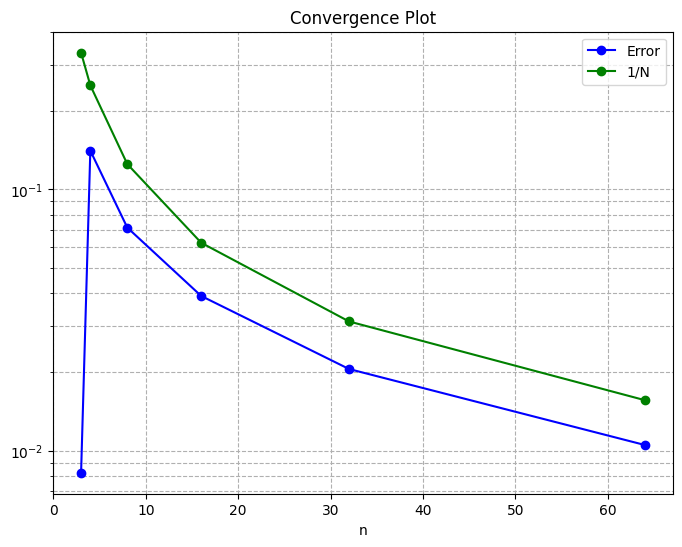

In [ ]:
plt.figure(figsize=(8, 6))
plt.semilogy(N, e, marker='o', linestyle='-', color='b', label='Error')
plt.semilogy(N,1/N, marker='o', linestyle='-', color='g', label='1/N')
plt.xlabel('n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [ ]:
sol=-np.cos(4)+np.cos(3)+np.cos(2)-np.cos(1)
e=[]
for n in N:
    [x_quad,w_quad] = GaussLobattoJacobiWeights(n, 0, 0)


    w=np.asarray(w_quad)
    w=np.expand_dims(w, axis=0)

    M=w*np.transpose(w)

    v=M.flatten()



    points=[[x,y] for y in x_quad for x in x_quad]
    points=np.array(points)


    res=t.integrate(v,points)
    e.append(np.abs(res-sol))

N=np.asarray(N)

KeyboardInterrupt: 

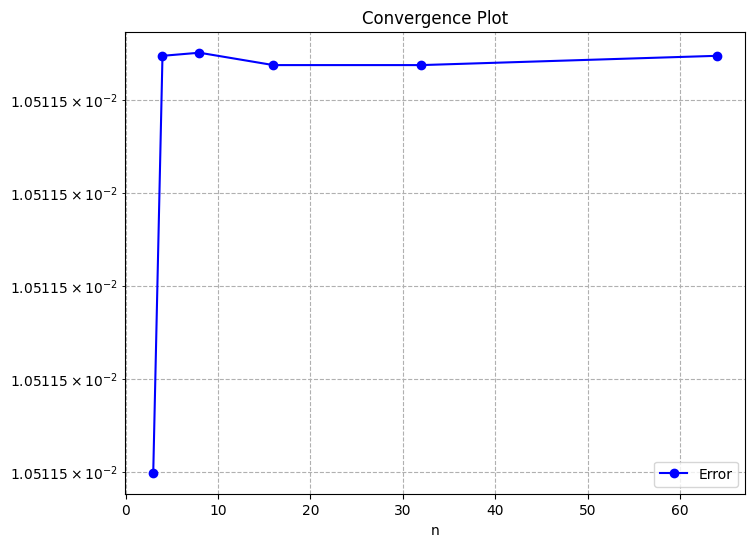

In [ ]:
plt.figure(figsize=(8, 6))
plt.semilogy(N, e, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [ ]:
print(res)

-1.3033094707023252


In [ ]:
L=[i for i in range(0,5)]
print(L)
import random
random.shuffle(L)
print(L)

[0, 1, 2, 3, 4]
[2, 0, 4, 3, 1]


In [ ]:
import numpy as np
from numpy.polynomial import legendre, chebyshev

# Degree of the quadrature rule
degree = 5

# Gauss-Legendre quadrature points and weights
legendre_points, legendre_weights = legendre.leggauss(degree)

# Chebyshev-Gauss quadrature points and weights (over the interval [-1, 1]),Chebyshev-Gauss quadrature an efficient method for numerical integration, especially for functions with singularities or rapidly oscillating behavior.
chebyshev_points, chebyshev_weights = chebyshev.chebgauss(degree)
chebyshev_points = chebyshev_points[::-1]



print("Gauss-Legendre Quadrature Points:", legendre_points)
print("Gauss-Legendre Quadrature Weights:", legendre_weights)
print()
print("Chebyshev-Gauss Quadrature Points:", chebyshev_points)
print("Chebyshev-Gauss Quadrature Weights:", chebyshev_weights)





Gauss-Legendre Quadrature Points: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Gauss-Legendre Quadrature Weights: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]

Chebyshev-Gauss Quadrature Points: [-9.51056516e-01 -5.87785252e-01  6.12323400e-17  5.87785252e-01
  9.51056516e-01]
Chebyshev-Gauss Quadrature Weights: [0.62831853 0.62831853 0.62831853 0.62831853 0.62831853]


In [ ]:
w=np.expand_dims(legendre_weights, axis=0)

M=w*np.transpose(w)

v=M.flatten()
print(v)


points=[[x,y] for y in legendre_points for x in legendre_points]
points=np.array(points)
print(points)



[0.00444507 0.00996412 0.01460678 0.01795237 0.019703   0.019703
 0.01795237 0.01460678 0.00996412 0.00444507 0.00996412 0.02233571
 0.03274275 0.04024227 0.04416649 0.04416649 0.04024227 0.03274275
 0.02233571 0.00996412 0.01460678 0.03274275 0.04799883 0.05899267
 0.06474533 0.06474533 0.05899267 0.04799883 0.03274275 0.01460678
 0.01795237 0.04024227 0.05899267 0.07250457 0.07957484 0.07957484
 0.07250457 0.05899267 0.04024227 0.01795237 0.019703   0.04416649
 0.06474533 0.07957484 0.08733457 0.08733457 0.07957484 0.06474533
 0.04416649 0.019703   0.019703   0.04416649 0.06474533 0.07957484
 0.08733457 0.08733457 0.07957484 0.06474533 0.04416649 0.019703
 0.01795237 0.04024227 0.05899267 0.07250457 0.07957484 0.07957484
 0.07250457 0.05899267 0.04024227 0.01795237 0.01460678 0.03274275
 0.04799883 0.05899267 0.06474533 0.06474533 0.05899267 0.04799883
 0.03274275 0.01460678 0.00996412 0.02233571 0.03274275 0.04024227
 0.04416649 0.04416649 0.04024227 0.03274275 0.02233571 0.00996412

In [ ]:
sol=-np.cos(4)+np.cos(3)+np.cos(2)-np.cos(1)
e=[]
for n in N:
    t=rectangular_mesh(n,n,2,3,-1,1)
    res=t.integrate(v,points)
    e.append(np.abs(res-sol))
N=np.asarray(N)

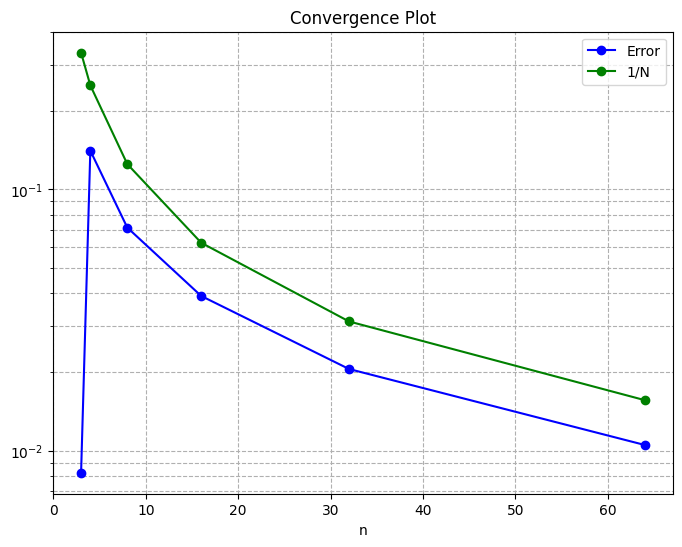

In [ ]:
plt.figure(figsize=(8, 6))
plt.semilogy(N, e, marker='o', linestyle='-', color='b', label='Error')
plt.semilogy(N,1/N, marker='o', linestyle='-', color='g', label='1/N')
plt.xlabel('n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [ ]:
degree = 3

# Point at which to evaluate the Legendre polynomial and its derivative
x = [-1,1]  # You can change this to any value within the interval [-1, 1]

# Evaluate the Legendre polynomial of the given degree at the specified point
legendre_value = legendre.legval(x, [0] * (degree - 1) + [1])

# Evaluate the derivative of the Legendre polynomial of the given degree at the specified point
legendre_derivative = legendre.legval(x, [0] * (degree - 1) + [0, 1])

print(f"Legendre Polynomial of degree {degree} at x = {x}: {legendre_value}")
print(f"First Derivative of Legendre Polynomial of degree {degree} at x = {x}: {legendre_derivative}")


Legendre Polynomial of degree 3 at x = [-1, 1]: [1. 1.]
First Derivative of Legendre Polynomial of degree 3 at x = [-1, 1]: [-1.  1.]


In [1]:
def translate(nodes: list, vertices: list):
        """
        Translates given nodes in the reference
        case ([0, 0], [1, 0], [0, 1]) to an arbritrary triangle
        """

        # print(nodes)
        # print(vertices)

        output = np.zeros(shape=np.shape(nodes))

        output[:, 0] = (
            nodes[:, 0] * (vertices[1, 0] - vertices[0, 0])
            + nodes[:, 1] * (vertices[2, 0] - vertices[0, 0])
            + vertices[0, 0]
        )

        output[:, 1] = (
            nodes[:, 0] * (vertices[1, 1] - vertices[0, 1])
            + nodes[:, 1] * (vertices[2, 1] - vertices[0, 1])
            + vertices[0, 1]
        )

        det = (vertices[1, 0] - vertices[0, 0]) * (vertices[2, 1] - vertices[0, 1]) - (
            vertices[2, 0] - vertices[0, 0]
        ) * (vertices[1, 1] - vertices[0, 1])

        return output, det

In [42]:
import numpy as np
import triangle as tr
N=3
N_points=(N+1)*N//2

t=rectangular_mesh(N-1,N-1,0,1,0,1)
t.print()

x = np.linspace(0, 1,N)
xx, yy = np.meshgrid(x,x)
xx = xx.flatten(); yy = yy.flatten()
filt = xx + yy <= 1
grid = np.vstack([xx[filt], yy[filt]]).transpose()
print(len(grid))


element number :  0
even_triangle
top-right vertex :  0.5 0.5
top-left vertex :  0.0 0.5
bottom-right vertex :  0.5 0.0
element number :  1
odd_triangle
top-left vertex :  0.0 0.5
bottom-left vertex :  0.0 0.0
bottom-right vertex :  0.5 0.0
element number :  2
even_triangle
top-right vertex :  0.5 1.0
top-left vertex :  0.0 1.0
bottom-right vertex :  0.5 0.5
element number :  3
odd_triangle
top-left vertex :  0.0 1.0
bottom-left vertex :  0.0 0.5
bottom-right vertex :  0.5 0.5
element number :  4
even_triangle
top-right vertex :  0.5 1.5
top-left vertex :  0.0 1.5
bottom-right vertex :  0.5 1.0
element number :  5
odd_triangle
top-left vertex :  0.0 1.5
bottom-left vertex :  0.0 1.0
bottom-right vertex :  0.5 1.0
element number :  6
element number :  7
6


[[3 0 1]
 [5 3 4]
 [1 2 4]
 [1 4 3]]
[[0.  0. ]
 [0.5 0. ]
 [1.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [0.  1. ]]


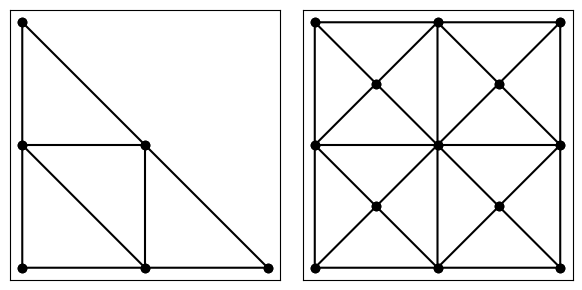

In [40]:
T=tr.triangulate(dict(vertices=grid))
tr.compare(plt,T,B)
print(T['triangles'])

print(T['vertices'])

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import triangle as tr

N = 4
x = np.linspace(0, 1, N)
xx, yy = np.meshgrid(x, x)
xx = xx.flatten()
yy = yy.flatten()
filt = xx + yy <= 1
grid = np.vstack([xx[filt], yy[filt]]).transpose()

# Perform triangulation
T = tr.triangulate(dict(vertices=grid))

# Modify T['triangles'] if needed
# For example, to add an offset to the triangle indices:
offset = len(grid)  # The offset value you want to add

# Visualize the triangulation
tr.compare(plt, T, grid, T['triangles'])
plt.show()


TypeError: from_bounds() takes 4 positional arguments but 13 were given

In [147]:
N = 4
c = -1
for w in [3,2,1]:
    c +=1
    for i in range(w):
        print(i + N*c)
    

0
1
2
4
5
8


In [20]:
from meshpy.tet import MeshInfo, build

mesh_info = MeshInfo()

mesh_info.set_points(grid)

ValueError: value must be a sequence of length self.unit

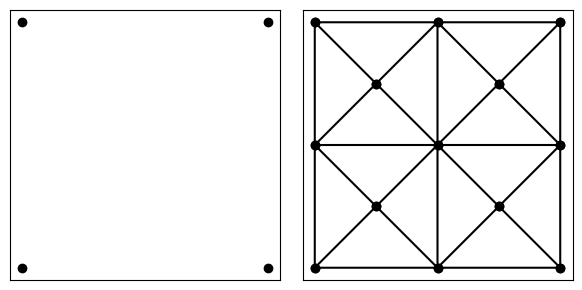

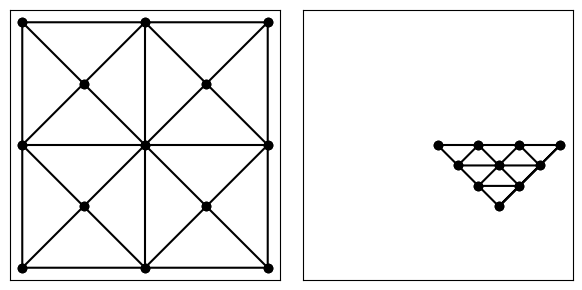

In [16]:
import matplotlib.pyplot as plt
import numpy as np

import triangle as tr


list=[]

n=[]

A = dict(vertices=np.array(((0, 0), (1, 0), (1, 1), (0, 1))))

B = tr.triangulate(A, 'qa0.1')
tr.compare(plt, A, B)
plt.show()
for elem in range(0,len(B['triangles'])):

    v = B['vertices'][B['triangles'][elem]]



    #anticlockwise

    t, j =translate(T['vertices'],v)

    D = tr.triangulate(dict(vertices=t))
    D['triangles']=T['triangles']


    n.append(len(D['triangles']))
    list.append(D)



tr.compare(plt,B,list[0])

plt.show()



In [18]:
print(B['vertices'])
print(len(B['vertices']))

print()
print(B['triangles'][0])

print(B['edges'])


for e in range(len(B['triangles'])):
    print('triangle number : ',e)
    print('vertices : ',B['triangles'][e])


[[0.   0.  ]
 [1.   0.  ]
 [1.   1.  ]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.   0.5 ]
 [0.5  0.  ]
 [0.5  1.  ]
 [0.25 0.25]
 [1.   0.5 ]
 [0.25 0.75]
 [0.75 0.75]
 [0.75 0.25]]
13

[ 4 12  9]


KeyError: 'edges'

In [ ]:
# Calculate characteristic size of the mesh (length of longest edge among all triangles)
def max_length(B):
    vertices = B['vertices']
    triangles = B['triangles']
    characteristic_sizes = []

    for triangle_indices in triangles:
        triangle_vertices = vertices[triangle_indices]
        # Calculate distances between vertices
        side_lengths = [np.linalg.norm(triangle_vertices[i] - triangle_vertices[(i + 1) % 3]) for i in range(3)]
        # Characteristic size is the length of the longest edge
        characteristic_size = max(side_lengths)
        characteristic_sizes.append(characteristic_size)

    # Characteristic size of the mesh is the maximum size among all triangles
    mesh_characteristic_size = max(characteristic_sizes)
    return mesh_characteristic_size     

In [ ]:
vertex=B['vertices'][B['triangles']][0]
H=max_length(B)
print("H =",H)

h=-1.0
for elem in list:
    if h<max_length(elem):
        h=max_length(elem)

print("h =",h)

print("H/h =",H/h)

H = 0.06502309554967599
h = 0.03167950048061552
H/h = 2.0525290665319424


In [ ]:
def traslate_points(input,vert):
        
        output=np.zeros(shape=np.shape(input))
        
        output[:, 0] = input[:,0]*(vert[1,0]-vert[0,0])  +input[:,1]*(vert[2,0]-vert[0,0])     +   vert[0,0]
    
        output[:, 1] = input[:,0]*(vert[1,1]-vert[0,1])  +input[:,1]*(vert[2,1]-vert[0,1])     +   vert[0,1]


        det=(vert[1,0]-vert[0,0])*(vert[2,1]-vert[0,1])-(vert[2,0]-vert[0,0])*(vert[1,1]-vert[0,1])

        return output,det

In [ ]:
point=np.asarray([[0.0,1.0]])
print(traslate_points(point,vertex))

(array([[1. , 0.5]]), 0.125)


In [ ]:
import numpy as np
from scipy.special import roots_legendre

def gauss_legendre_quadrature(order):
    # Calculate Gauss-Legendre nodes and weights on the interval [-1, 1]
    nodes, weights = roots_legendre(order)
    
    # Map nodes and weights from [-1, 1] interval to [0, 1] interval for triangular domain
    nodes = 0.5 * (nodes + 1)
    weights = 0.5 * weights
    
    # Generate 2D quadrature points and weights for the reference triangle
    points = []
    weights_2d=[]

    for i in range(order):
        for j in range(order):
            if nodes[i]+nodes[j]<=1:
                points.append([nodes[i], nodes[j]])
                weights_2d.append(weights[i]*weights[j])
    
    return np.array(points),np.array(weights_2d)

# Example usage
order = 20  # Specify the desired order
points, weights = gauss_legendre_quadrature(order)

print("Gauss-Legendre Quadrature Points (Reference Triangle):")
print(points)
print("Gauss-Legendre Quadrature Weights (Reference Triangle):")
print(weights)




def f(x):
    return np.square(x[:,0]+x[:,1])


print(np.sum(f(points)*weights))



Gauss-Legendre Quadrature Points (Reference Triangle):
[[0.0034357  0.0034357 ]
 [0.0034357  0.01801404]
 [0.0034357  0.04388279]
 [0.0034357  0.08044151]
 [0.0034357  0.12683405]
 [0.0034357  0.18197316]
 [0.0034357  0.2445665 ]
 [0.0034357  0.31314696]
 [0.0034357  0.38610707]
 [0.0034357  0.46173674]
 [0.0034357  0.53826326]
 [0.0034357  0.61389293]
 [0.0034357  0.68685304]
 [0.0034357  0.7554335 ]
 [0.0034357  0.81802684]
 [0.0034357  0.87316595]
 [0.0034357  0.91955849]
 [0.0034357  0.95611721]
 [0.0034357  0.98198596]
 [0.0034357  0.9965643 ]
 [0.01801404 0.0034357 ]
 [0.01801404 0.01801404]
 [0.01801404 0.04388279]
 [0.01801404 0.08044151]
 [0.01801404 0.12683405]
 [0.01801404 0.18197316]
 [0.01801404 0.2445665 ]
 [0.01801404 0.31314696]
 [0.01801404 0.38610707]
 [0.01801404 0.46173674]
 [0.01801404 0.53826326]
 [0.01801404 0.61389293]
 [0.01801404 0.68685304]
 [0.01801404 0.7554335 ]
 [0.01801404 0.81802684]
 [0.01801404 0.87316595]
 [0.01801404 0.91955849]
 [0.01801404 0.95611

In [ ]:
integral=1/12
e=[]
n=[]
for order in range(10,101,10):  # Specify the desired order
            points, weights = gauss_legendre_quadrature(order)

            n.append(order)



            def f(x):
                return np.square(x[:,0])


            print(np.sum(f(points)*weights))
            e.append(np.abs(np.sum(f(points)*weights)-integral))
e=np.asarray(e)
n=np.asarray(n)


0.10228400961133359
0.09289432239682287
0.0897254483455369
0.08813398852668881
0.08717694095907504
0.08653802619650623
0.08608123368894466
0.08573841014601673
0.08547163526945097
0.08525813146559019


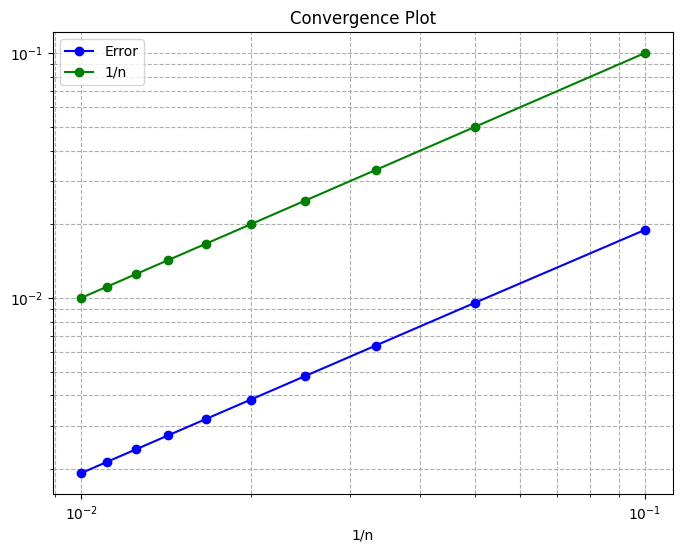

In [ ]:
plt.figure(figsize=(8, 6))
plt.loglog(1/n, e, marker='o', linestyle='-', color='b', label='Error')
plt.loglog(1/n, 1/n, marker='o', linestyle='-', color='g', label='1/n')

plt.xlabel('1/n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

1.303796442938957 1.1666666666666667
1.2369719035915832 1.1666666666666667
1.2139315387230067 1.1666666666666667
1.2022640662616273 1.1666666666666667
1.1952161233102034 1.1666666666666667
1.1904976618508682 1.1666666666666667
1.187117603326235 1.1666666666666667
1.1845772341328267 1.1666666666666667
1.1825982338723153 1.1666666666666667
1.1810130436260642 1.1666666666666667
1.1797147536956831 1.1666666666666667
1.1786319404224466 1.1666666666666667
1.1777150711057098 1.1666666666666667
1.1769287141548304 1.1666666666666667
1.176246854603965 1.1666666666666667
1.1756499607280075 1.1666666666666667
1.1751230828793369 1.1666666666666667
1.174654584260844 1.1666666666666667
1.174235271439228 1.1666666666666667
1.1738577850444856 1.1666666666666667


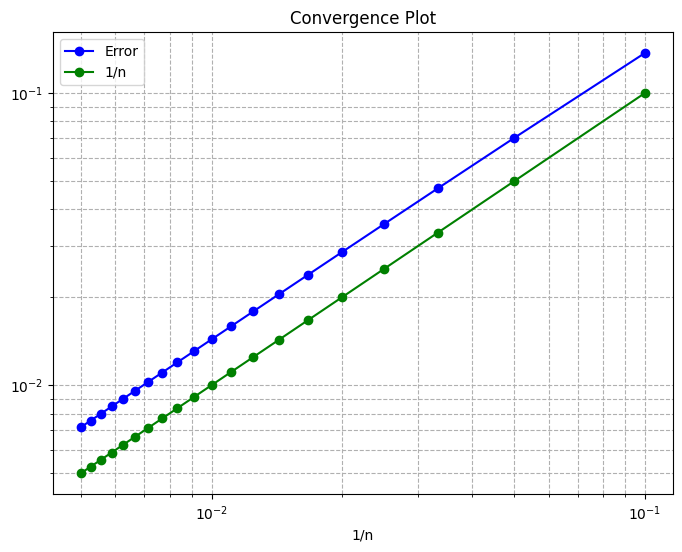

In [ ]:
e=[]
n=[]
for order in range(10,201,10):  # Specify the desired order
        points, weights = gauss_legendre_quadrature(order)

        n.append(order)      
        tot=0.0
        integral=7/6
        for triangle_ in list:
            for elem in range(len(triangle_['vertices'][triangle_['triangles']])):
                            
                vertex=triangle_['vertices'][triangle_['triangles'][elem]]
                output,det=traslate_points(points,vertex)
                tot+=np.sum(f(output)*weights*det)


        print(tot,integral)
        
        e.append(np.abs(tot-integral))
e=np.asarray(e)
n=np.asarray(n)


plt.figure(figsize=(8, 6))
plt.loglog(1/n, e, marker='o', linestyle='-', color='b', label='Error')
plt.loglog(1/n, 1/n, marker='o', linestyle='-', color='g', label='1/n')

plt.xlabel('1/n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()


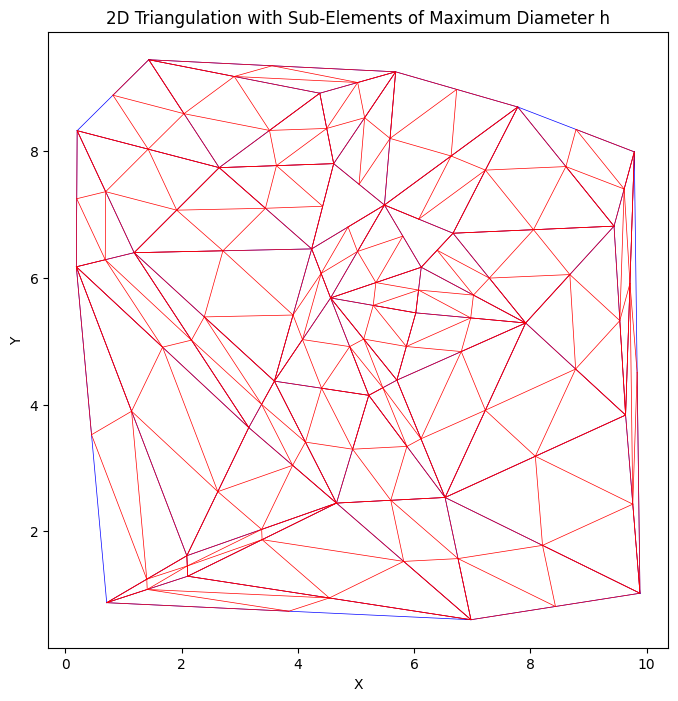

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Step 1: Generate Initial Triangulation with Mesh Size H
# Generate random points within a bounding box
np.random.seed(0)
num_points = 30
bounding_box = [0, 10, 0, 10]
points = np.random.rand(num_points, 2) * [bounding_box[1]-bounding_box[0], bounding_box[3]-bounding_box[2]] + [bounding_box[0], bounding_box[2]]

# Compute Delaunay triangulation using scipy.spatial.Delaunay
triangulation = Delaunay(points)

# Step 2: Generate Sub-Elements with Maximum Diameter h
h = 1.5  # Maximum diameter for sub-elements

sub_elements = []
for simplex in triangulation.simplices:
    triangle = points[simplex]
    # Calculate the diameter (maximum edge length) of the triangle
    diameter = np.max(np.linalg.norm(triangle - np.roll(triangle, 1, axis=0), axis=1))
    
    # Subdivide the triangle if its diameter is greater than h
    if diameter > h:
        midpoints = [(triangle[i] + triangle[j]) / 2 for i, j in [(0, 1), (1, 2), (2, 0)]]
        sub_triangles = [[triangle[0], midpoints[0], midpoints[2]],
                         [midpoints[0], triangle[1], midpoints[1]],
                         [midpoints[1], triangle[2], midpoints[2]],
                         [midpoints[0], midpoints[1], midpoints[2]]]
        sub_elements.extend(sub_triangles)
    else:
        sub_elements.append(triangle)

# Plotting
plt.figure(figsize=(8, 8))
plt.triplot(points[:, 0], points[:, 1], triangulation.simplices, linewidth=0.5, color='blue')
for triangle in sub_elements:
    plt.plot([triangle[i][0] for i in range(3)], [triangle[i][1] for i in range(3)], linewidth=0.5, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Triangulation with Sub-Elements of Maximum Diameter h')
plt.show()


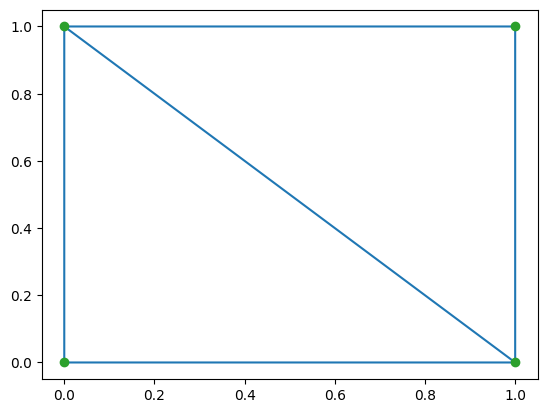

In [19]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np

# Define your points as a NumPy array
points = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

# Perform Delaunay triangulation
triangulation = Delaunay(points)

# Plot the Delaunay triangulation
plt.triplot(points[:, 0], points[:, 1], triangulation.simplices.copy())
plt.plot(points[:, 0], points[:, 1], 'o')
plt.show()

In [24]:
print(triangulation.simplices)


print(triangulation.vertex_neighbor_vertices)


[[2 3 1]
 [1 3 0]]
(array([ 0,  2,  5,  7, 10], dtype=int32), array([1, 3, 2, 3, 0, 3, 1, 2, 1, 0], dtype=int32))


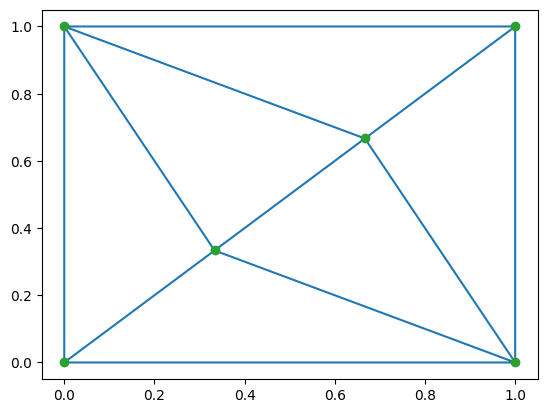

In [27]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np

# Define the vertices of the square domain
square_vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

# Perform Delaunay triangulation to create an initial coarse mesh
triangulation = Delaunay(square_vertices)

# Refinement: Add additional points inside triangles (for example, barycenter)
refined_points = np.vstack([square_vertices, np.mean(square_vertices[triangulation.simplices], axis=1)])
triangulation = Delaunay(refined_points)

# Plot the refined triangular mesh
plt.triplot(refined_points[:, 0], refined_points[:, 1], triangulation.simplices.copy())
plt.plot(refined_points[:, 0], refined_points[:, 1], 'o')
plt.show()

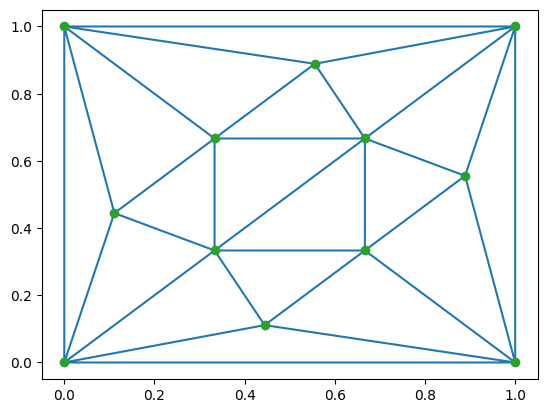

In [30]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np

def refine_square_mesh(square_vertices, num_subdivisions):
    # Perform initial Delaunay triangulation
    triangulation = Delaunay(square_vertices)
    
    # Refinement: Add additional points inside triangles (for example, barycenter)
    refined_points = square_vertices.copy()
    for _ in range(num_subdivisions):
        refined_points = np.vstack([refined_points, np.mean(refined_points[triangulation.simplices], axis=1)])
        triangulation = Delaunay(refined_points)
    
    return triangulation, refined_points

# Define the vertices of the square domain
square_vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

# Number of subdivisions (refinements) to perform
num_subdivisions = 2

# Refine the square mesh automatically
triangulation, refined_points = refine_square_mesh(square_vertices, num_subdivisions)

# Plot the refined triangular mesh
plt.triplot(refined_points[:, 0], refined_points[:, 1], triangulation.simplices.copy())
plt.plot(refined_points[:, 0], refined_points[:, 1], 'o')
plt.show()


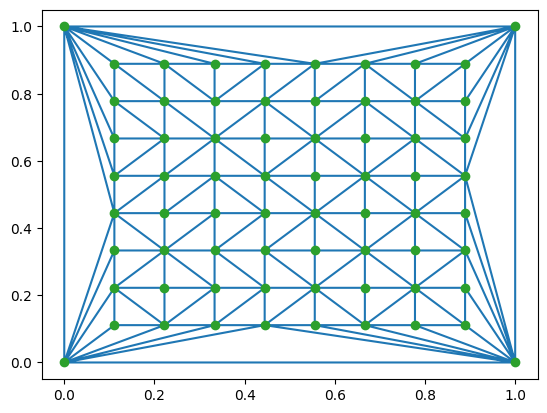

In [32]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import numpy as np

def generate_regular_mesh(square_vertices, num_divisions):
    # Generate regular mesh points inside the square
    step = 1 / (num_divisions + 1)
    regular_points = []
    for i in range(1, num_divisions + 1):
        for j in range(1, num_divisions + 1):
            x = i * step
            y = j * step
            regular_points.append([x, y])
    regular_points = np.array(regular_points)
    
    # Combine square vertices and regular points
    all_points = np.vstack([square_vertices, regular_points])
    
    # Perform Delaunay triangulation
    triangulation = Delaunay(all_points)
    
    return triangulation, all_points

# Define the vertices of the square domain
square_vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

# Number of divisions (subdivisions) within the square
num_divisions = 8

# Generate a regular mesh automatically
triangulation, mesh_points = generate_regular_mesh(square_vertices, num_divisions)

# Plot the regular triangular mesh
plt.triplot(mesh_points[:, 0], mesh_points[:, 1], triangulation.simplices.copy())
plt.plot(mesh_points[:, 0], mesh_points[:, 1], 'o')
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CGAL.CGAL_Kernel import Point_2
from CGAL.CGAL_Triangulation_2 import Constrained_Delaunay_triangulation_2
from CGAL.CGAL_Triangulation_2 import Constrained_Delaunay_triangulation_2_Face_base_with_info_2
from CGAL.CGAL_Triangulation_2 import Constrained_Delaunay_triangulation_2_Vertex_base_2
from CGAL.CGAL_Triangulation_2 import Constrained_Delaunay_triangulation_2_Face_2

# Define the vertices of the square domain
square_vertices = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

# Create a CGAL triangulation object
cgal_triangulation = Constrained_Delaunay_triangulation_2()

# Insert vertices into the triangulation
for vertex in square_vertices:
    cgal_triangulation.insert(Point_2(vertex[0], vertex[1]))

# Insert constraints (segments) to enforce the square boundary
for i in range(4):
    cgal_triangulation.insert_constraint(Point_2(square_vertices[i][0], square_vertices[i][1]),
                                         Point_2(square_vertices[(i+1)%4][0], square_vertices[(i+1)%4][1]))

# Extract the vertices and triangles from the CGAL triangulation
mesh_points = [(vertex.x(), vertex.y()) for vertex in cgal_triangulation.finite_vertices()]
mesh_triangles = [(face.vertex(i).point().x(), face.vertex(i).point().y()) for face in cgal_triangulation.finite_faces() for i in range(3)]

# Plot the triangular mesh
mesh_points = np.array(mesh_points)
mesh_triangles = np.array(mesh_triangles)
plt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_triangles[:, [0, 1, 2]])
plt.plot(mesh_points[:, 0], mesh_points[:, 1], 'o')
plt.show()


ModuleNotFoundError: No module named 'CGAL'

The point is inside triangle 2.


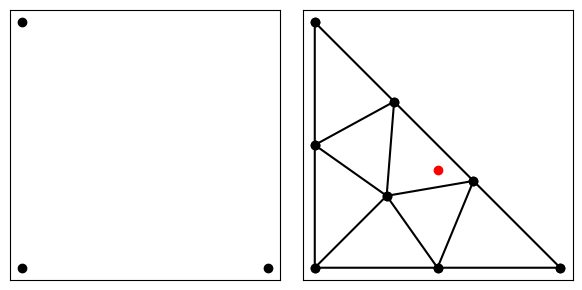

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr

A = dict(vertices=np.array(((0, 0), (1, 0), (0, 1))))
triangulation = tr.triangulate(A, 'qa0.1')

# Point to be tested
test_point = np.array((0.5, 0.4))  # Change this to the point you want to test

# Function to check if a point is inside a triangle using barycentric coordinates
def point_in_triangle(p, vertices):
    v0, v1, v2 = vertices
    detT = (v1[1] - v2[1]) * (v0[0] - v2[0]) + (v2[0] - v1[0]) * (v0[1] - v2[1])
    barycentric_coords = [
        ((v1[1] - v2[1]) * (p[0] - v2[0]) + (v2[0] - v1[0]) * (p[1] - v2[1])) / detT,
        ((v2[1] - v0[1]) * (p[0] - v2[0]) + (v0[0] - v2[0]) * (p[1] - v2[1])) / detT,
    ]
    return 0 <= barycentric_coords[0] <= 1 and 0 <= barycentric_coords[1] <= 1 and sum(barycentric_coords) <= 1

# Find which triangle the test_point is in
triangle_index = None
for i, simplex in enumerate(triangulation['triangles']):
    vertices = triangulation['vertices'][simplex]
    if point_in_triangle(test_point, vertices):
        triangle_index = i
        break

if triangle_index is not None:
    print(f"The point is inside triangle {triangle_index}.")
else:
    print("The point is outside the triangulation.")

# Plotting for visualization
tr.compare(plt, A, triangulation)
plt.plot(test_point[0], test_point[1], 'ro')
plt.show()


In [24]:
def f(x,y):
    return x*x + y*y

In [26]:
def lagrange_basis(points, i, x, y):
    result = 1
    for j, point in enumerate(points):
        if i != j and (points[i][0] != point[0] or points[i][1] != point[1]):
            denominator = (points[i][0] - point[0]) * (points[i][1] - point[1])
            if denominator != 0:
                result *= ((x - point[0]) * (y - point[1])) / denominator
    return result

def lagrangian_interpolation(points, values, x, y):
    interpolation = 0
    for i in range(len(points)):
        interpolation += lagrange_basis(points, i, x, y) * values[i]
    return interpolation

# Example usage
# Define points and corresponding function values
points = [(0, 0), (1, 0), (0, 1)]
values = [f(point[0], point[1]) for point in points]  # Replace f(x, y) with your function

# Point to interpolate
x = 0.0
y = 0.0

# Perform Lagrangian interpolation
interpolated_value = lagrangian_interpolation(points, values, x, y)
print(f'Interpolated value at ({x}, {y}): {interpolated_value}')


Interpolated value at (0.0, 0.0): 0.0


In [34]:
import numpy as np

def lagrange_basis(points, x, y):
    n = len(points) - 1
    basis = np.ones(n + 1)
    for i, (x_i, y_i) in enumerate(points):
        for j, (x_j, y_j) in enumerate(points):
            if i != j and x_i != x_j and y_i != y_j:  # Check for division by zero
                basis[i] *= (x - x_j) * (y - y_j) / ((x_i - x_j) * (y_i - y_j))
    return basis

def lagrangian_interpolation_matrix(points, values, x, y):
    n = len(points) - 1
    A = np.array([lagrange_basis(points, x_i, y_i) for x_i, y_i in points])
    B = np.array(values)
    X = np.linalg.solve(A, B)
    interpolated_value = sum(X[i] * basis for i, basis in enumerate(lagrange_basis(points, x, y)))
    return interpolated_value

# Example usage
points = [(0, 0), (1, 0), (0, 1)]
values = [f(x, y) for x, y in points]  # Replace f(x, y) with your function

x = 0.5
y = 0.5

interpolated_value = lagrangian_interpolation_matrix(points, values, x, y)
print(f'Interpolated value at ({x}, {y}): {interpolated_value}')

Interpolated value at (0.5, 0.5): 0.5


In [26]:
import numpy as np


points = [(0, 0), (1, 0), (0, 1)]



#save num and den(number)

def precompute_coefficients(points):
    numerator_x =[]
    numerator_y =[]
    denominator=[]

    for i, (x_i, y_i) in enumerate(points):
        num_x=[]
        num_y=[]
        den_x=1.0
        den_y=1.0
        for j, (x_j, y_j) in enumerate(points):
            if i != j:
                    

                    if y_i != y_j:
                        num_y.append(y_j)
                        den_y*=((y_i-y_j))
                    if x_i != x_j:
                        num_x.append(x_j)
                        den_x*=((x_i-x_j))
                    

        numerator_x.append(num_x)
        numerator_y.append(num_y)
        denominator.append(den_x*den_y)



    return num_x,num_y,denominator


coefficients_x,coefficients_y=precompute_coefficients(points)

print(coefficients_x)
print(coefficients_y)



val=np.array([1.0,2.0,3.0],dtype=np.float64)

print(coefficients_x)
print(coefficients_y)

point=np.array([0.0,0.0])
print(np.shape(point))




print()
def eval_lagrange(coefficients_x, coefficients_y, val, point):
    n = len(coefficients_x)
    delta_x = point[0] - coefficients_x
    delta_y = point[1] - coefficients_y
    terms = val * np.prod([delta_x, delta_y], axis=0)
    result = np.sum(terms)
    return result

print(eval_lagrange(coefficients_x,coefficients_y,val,point))



[[-1.0], [0.0, 0.0], [-1.0]]
[[-1.0], [-1.0], [0.0, 0.0]]
[[-1.0], [0.0, 0.0], [-1.0]]
[[-1.0], [-1.0], [0.0, 0.0]]
(2,)



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [27]:

coefficients_x,coefficients_y=precompute_coefficients(points)

print(coefficients_x)
print(coefficients_y)

[[-1.0], [0.0, 0.0], [-1.0]]
[[-1.0], [-1.0], [0.0, 0.0]]


In [10]:
interpolated_x, interpolated_y = interpolate(0.0, 0.0,coefficients_x,coefficients_y)


-1.0
0.0
-1.0


In [29]:

import numpy as np

points = [(0, 0), (1, 0), (0, 1)]



#save num and den(number)

def precompute_coefficients(points):
    numerator_x =[]
    numerator_y =[]
    denominator=[]

    for i, (x_i, y_i) in enumerate(points):
        num_x=[]
        num_y=[]
        den_x=1.0
        den_y=1.0
        for j, (x_j, y_j) in enumerate(points):
            if i != j:
                    if y_i != y_j:
                        num_y.append(y_j)
                        den_y*=(y_i-y_j)
                    if x_i != x_j:
                        num_x.append(x_j)
                        den_x*=(x_i-x_j)
        if len(num_x)==0: 
             print('empty x')
        if len(num_y)==0: 
             print('empty y')
                    
        numerator_x.append(np.array(num_x,dtype=np.float64))
        numerator_y.append(np.array(num_y,dtype=np.float64))
        denominator.append(den_x*den_y)



    return numerator_x,numerator_y,denominator


coefficients_x,coefficients_y,den=precompute_coefficients(points)

print(coefficients_x)
print(coefficients_y)
print(den)

[array([1.]), array([0., 0.]), array([1.])]
[array([1.]), array([1.]), array([0., 0.])]
[1.0, -1.0, -1.0]


In [46]:
def eval(x,y,val):
    res=0.0
    for ii in range(0,len(coefficients_x)):
        temp_x=np.prod(x-coefficients_x[ii])
        
        temp_y=np.prod(y-coefficients_y[ii])

        res+=temp_x*temp_y*val[ii]/den[ii]

    
    return res


In [49]:
val=np.array([1.0,2.0,3.0])


print(eval(0.5,0.5,val))

0.875


In [45]:
from scipy.interpolate import LinearNDInterpolator
import numpy as np

# Define your data points and values
points = np.array([[0, 0], [1, 0], [0, 1]])
values = np.array([1, 2, 3])

# Create a LinearNDInterpolator object
interpolator = LinearNDInterpolator(points, values)

# Define the points where you want to interpolate the values
interpolation_points = np.array([[0.5, 0.5], [0.5, 0.0]])

# Perform interpolation
interpolated_values = interpolator(interpolation_points)

print("Interpolated Values:", interpolated_values)

Interpolated Values: [2.5 1.5]
